# Анализ совершенных покупок e-commerce

Файлы:

 olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

olist_orders_dataset.csv —  таблица заказов
order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5

Уникальные статусы заказов в таблице olist_orders_dataset:

created —  создан
approved —  подтверждён
invoiced —  выставлен счёт
processing —  в процессе сборки заказа
shipped —  отгружен со склада
delivered —  доставлен пользователю
unavailable —  недоступен
canceled —  отменён

In [87]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
import datetime as dt

In [2]:
#датасет с данными о покупателях
customers = pd.read_csv(r'C:\Users\yurkina_yv/olist_customers_dataset.csv')
#датасет с данными о заказах
orders = pd.read_csv(r'C:\Users\yurkina_yv/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date' ] )
#датасет с данными о товарах
order_items = pd.read_csv(r'C:\Users\yurkina_yv/olist_order_items_dataset.csv',parse_dates=['shipping_limit_date'])

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [5]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [7]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [8]:
print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


### Посмотрим, сколько пользователей, которые совершили покупку только один раз

In [9]:
# чтобы посмотреть на статус заказов и определить, что считать покупкой

orders.groupby('order_status')\
.agg({"order_id": "count"})

,order_id
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


Покупку будем считать завершенной, если статус заказа delivered.

In [10]:
# проверяем пропущенные значения

customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
# Объединим таблицы заказов и покупателей

customers_orders = orders.merge(customers, on = 'customer_id', how='left')
customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [14]:
# Посчитаем сделанные покупки каждым уникальным покупателем. Будем считать покупкой, если товар доставлен (статус заказа delivered)

delivery_orders = customers_orders.loc[customers_orders['order_status'] == 'delivered'] \
.groupby('customer_unique_id',as_index=False) \
.agg({'order_id':'count'}) \
.query('order_id == 1') \
.count().order_id
delivery_orders

90557

90 557 покупателей сделали по одному заказу

In [15]:
# Посмотрим, верно ли посчитали

customers_orders.loc[customers_orders['order_status'] == 'delivered'] \
.groupby('customer_unique_id',as_index=False) \
.agg({'order_id':'count'}) \
.query('order_id > 1') \
.count().order_id \
    + customers_orders.loc[customers_orders['order_status'] == 'delivered'] \
.groupby('customer_unique_id',as_index=False) \
.agg({'order_id':'count'}) \
.query('order_id == 1') \
.count().order_id \
    == customers_orders.loc[customers_orders['order_status'] == 'delivered'] \
.groupby('customer_unique_id',as_index=False) \
.agg({'order_id':'count'}) \
.count().order_id

True

### Сколько заказов в месяц в среднем не доставляется по разным причинам?

In [16]:
# проверим, нет ли дублирования заказов

orders.groupby('order_id', as_index=False)\
.agg({'order_status':'count'})\
.order_status.unique() 
#заказов - по одному

array([1], dtype=int64)

In [17]:
# создадим колонку с месяцем и годом даты заказа

orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.to_period("M")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [18]:
orders.query('order_status in ("unavailable", "canceled")')\
        .groupby(['order_status', 'order_purchase_month'], as_index=False)\
        .agg({'order_id':'count'})\
        .groupby('order_status')\
        .agg({'order_id':'mean'})\
        .rename(columns = {'order_id':'orders_per_month'})\
        .round(1)

,orders_per_month
order_status,
canceled,26.0
unavailable,29.0


В среднем 26 раз в месяц покупатели либо сами отказываются от заказа (cancelled), либо 29 раз в месяц товары отсутствуют на складе (unavailable)

### В какой день недели каждый товар чаще всего покупается?

Под покупкой будем понимать, если товар доставлен

In [19]:
# объединяем заказы и товары

orders_items = orders.merge(order_items, on='order_id', how = 'left') \
    [['product_id','order_purchase_timestamp','order_status']]
orders_items.head()

,product_id,order_purchase_timestamp,order_status
0,87285b34884572647811a353c7ac498a,2017-10-02 10:56:33,delivered
1,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37,delivered
2,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49,delivered
3,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06,delivered
4,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39,delivered


In [20]:
# создадим колонку с днем недели заказа

orders_items['order_purchase_weekday'] = orders_items['order_purchase_timestamp'].dt.day_name()
orders_items.head()

,product_id,order_purchase_timestamp,order_status,order_purchase_weekday
0,87285b34884572647811a353c7ac498a,2017-10-02 10:56:33,delivered,Monday
1,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37,delivered,Tuesday
2,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49,delivered,Wednesday
3,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06,delivered,Saturday
4,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39,delivered,Tuesday


In [21]:
# проверим, есть ли пропущенные данные

orders_items.isna().sum()

product_id                  775
order_purchase_timestamp      0
order_status                  0
order_purchase_weekday        0
dtype: int64

In [22]:
# удаляем пропущенные данные

orders_items = orders_items.dropna()
orders_items

,product_id,order_purchase_timestamp,order_status,order_purchase_weekday
0,87285b34884572647811a353c7ac498a,2017-10-02 10:56:33,delivered,Monday
1,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37,delivered,Tuesday
2,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49,delivered,Wednesday
3,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06,delivered,Saturday
4,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39,delivered,Tuesday
...,...,...,...,...
113420,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-06 12:58:58,delivered,Tuesday
113421,b80910977a37536adeddd63663f916ad,2017-08-27 14:46:43,delivered,Sunday
113422,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08 21:28:27,delivered,Monday
113423,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08 21:28:27,delivered,Monday


In [23]:
orders_items.dtypes

product_id                          object
order_purchase_timestamp    datetime64[ns]
order_status                        object
order_purchase_weekday              object
dtype: object

In [24]:
# группируем данные по дням недели

items_weekday = orders_items.query('order_status == "delivered"') \
.groupby(['product_id','order_purchase_weekday'], as_index = False) \
.agg({'order_status':'count'}) \
.drop_duplicates(subset=["product_id"]) \
.rename(columns={'order_purchase_weekday':'purchase_day', 'order_status': 'delivery'})\
.sort_values('delivery',ascending = False)
items_weekday.head(100)

,product_id,purchase_day,delivery
40179,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,83
15591,422879e10f46682990de24d770e7f83d,Friday,77
35750,99a4788cb24856965c36a24e339b6058,Friday,74
12745,368c6c730842d78016ad823897a372db,Friday,67
19656,53759a2ecddad2bb87a079a1f1519f73,Friday,58
...,...,...,...
22469,5f504b3a1c75b73d6151be81eb05bdc9,Friday,11
32356,8aa6223e400af9c97b07c75993142721,Friday,11
26009,6ee7217ab647f3c2b4a5161c75cadab3,Friday,11
32756,8c5876b1c7768217964f353bc7e64393,Friday,11


Топ-100 товаров заказываются по пятницам.

### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)

In [25]:
customers_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [26]:
#создаем колонки с названием месяца и сколько недель в месяце
customers_orders['purchase_month'] = customers_orders['order_purchase_timestamp'].dt.to_period("M")

customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


In [27]:
customers_orders['number_weeks'] = orders['order_purchase_timestamp'].dt.days_in_month/7
customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month,number_weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,4.428571
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,4.428571
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,4.428571
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,4.285714
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,4.000000


Посмотрим на первую и последнюю даты заказов

In [28]:
customers_orders.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [29]:
customers_orders.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

In [30]:
# уберем из анализа неполные месяцы - сентябрь 2016 и октябрь 2018

customers_orders = customers_orders.query('purchase_month != "2016-09" and purchase_month != "2018-10"')

In [31]:
# посчитаем среднее количество доставленных заказов в месяц (т.е. покупок)

purchase_by_month = customers_orders.query('order_status == "delivered"') \
.groupby(['customer_unique_id','purchase_month','number_weeks'], as_index=False) \
.agg({'order_status':'count'}) \
.rename(columns={'order_status':'avg_orders'})\
.sort_values('avg_orders', ascending = False)

purchase_by_month.avg_orders = round(purchase_by_month.avg_orders / purchase_by_month.number_weeks, 2)

purchase_by_month

,customer_unique_id,purchase_month,number_weeks,avg_orders
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,4.428571,1.35
23222,3e43e6105506432c953e165fb2acf44c,2018-02,4.000000,1.00
60370,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4.000000,1.00
67359,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4.000000,1.00
74559,c8460e4251689ba205045f3ea17884a1,2018-08,4.428571,0.90
...,...,...,...,...
31900,55a55b65ef7f279bf0e5846a645e5ba6,2017-12,4.428571,0.23
31899,55a4c5ebfd8fcc86eb83882fa0464977,2018-01,4.428571,0.23
31898,55a44284e2c362a0199fb0df3ea9fb7d,2017-09,4.285714,0.23
31897,55a36ff7f14abc01688647c613b35836,2017-12,4.428571,0.23


Наибольшее количество покупок в неделю пользователи делали в январе 2017 года

### Когортный анализ пользователей (в период с января по декабрь выявим когорту с самым высоким retention на 3й месяц)

Признак формирования когорты — повторная покупка на третий месяц\
Размер когорты — временной интервал: месяц\
Отчетный период — 2017 год\
Анализируемый ключевой показатель: Retention Rate

In [32]:
# определим даты первой покупки и последней в датасете

print(f'Дата первой покупки: {customers_orders.order_purchase_timestamp.min()}\n\
Дата последней покупки: {customers_orders.order_purchase_timestamp.max()}')

Дата первой покупки: 2016-09-04 21:15:19
Дата последней покупки: 2018-10-17 17:30:18


Для исследование возьмём 2017 год, как полный. При этом последним месяцем будем считать 2018-03, чтобы учесть когорты до декабря 2017 г.

In [33]:
# создадим датафрейм с нужными нам колонками id клиента, датой заказа и датой подтверждения заказа

unique_users_per_month = customers_orders [['customer_unique_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at']]

# отфильтруем даты заказы в соответствии с условием по датам выше

unique_users_per_month = unique_users_per_month.query('order_purchase_timestamp>="2017-01-01" and order_purchase_timestamp<="2018-03-31"')

# а также отфильтруем на соответствие критерию покупки

unique_users_per_month = unique_users_per_month.query('order_approved_at != "NaT" and order_status in ("processing", "shipped", "delivered", "unavailable")')

In [34]:
unique_users_per_month.head()

,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15
3,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59
4,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29
5,80bb27c7c16e8f973207a5086ab329e2,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13
7,932afa1e708222e5821dac9cd5db4cae,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11


In [35]:
# в отдельный столбец выделим год и месяц заказа

unique_users_per_month ['purchase_month'] = customers_orders.order_purchase_timestamp.dt.strftime('%Y-%m')
unique_users_per_month.head()

,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10
3,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02
5,80bb27c7c16e8f973207a5086ab329e2,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07
7,932afa1e708222e5821dac9cd5db4cae,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05


In [36]:
# в отдельный датафрейм сохраним самый первый месяц заказа по пользователям

first_order_month = unique_users_per_month.groupby('customer_unique_id', as_index = False)\
                                        .agg({'purchase_month':'min'})\
                                        .rename (columns = {'purchase_month':'first_order_month'})
first_order_month.head()

,customer_unique_id,first_order_month
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


In [37]:
# объединим датафрейм с первым заказом с нашим рабочим датафреймом

unique_users_per_month = unique_users_per_month.merge(first_order_month, on = 'customer_unique_id', how = 'inner')

In [38]:
# посчитаем количество уникальных пользователей внутри первого месяца заказа и по возвращаемости на каждый последующий месяц

unique_users_per_month = unique_users_per_month.groupby (['first_order_month', 'purchase_month'], as_index = False)\
                    .agg({'customer_unique_id':'nunique'})\
                    .rename (columns = {'customer_unique_id':'count_of_unique_users'})

In [39]:
unique_users_per_month.head()

,first_order_month,purchase_month,count_of_unique_users
0,2017-01,2017-01,749
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [40]:
# создадим колонку, показывающую номер месяца для каждой когорты, считая от месяца первого заказа

unique_users_per_month ['month'] = unique_users_per_month.groupby('first_order_month').cumcount()
unique_users_per_month.head()

,first_order_month,purchase_month,count_of_unique_users,month
0,2017-01,2017-01,749,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4


In [41]:
# в отдельный датасет сохраним количество пользователей по первому месяцу

count_of_unique_users = unique_users_per_month.query('month == 0 and first_order_month<="2017-12"')\
                        [['first_order_month', 'count_of_unique_users']].set_index('first_order_month')

In [42]:
# создадим датасет, в который запишем сводную таблицу по когортам месяца и количеству пользователей на каждый
# последующий месяц по колонкам

rr_df = unique_users_per_month.pivot (index = "first_order_month", columns = 'month', values = 'count_of_unique_users')\
                    .query('index<="2017-12"')\
                    .divide(count_of_unique_users.count_of_unique_users, axis=0)
# в качестве нулевого месяца запишем точное число пользователей в этом месяц
rr_df [0] = count_of_unique_users.count_of_unique_users

In [43]:
rr_df

month,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_order_month,,,,,,,,,,,,,,
2017-01,749,0.004005,0.002670,0.001335,0.004005,0.001335,0.005340,0.001335,0.001335,0.004005,0.001335,0.008011,0.004005,0.001335
2017-02,1711,0.002338,0.002922,0.001169,0.004091,0.001169,0.002338,0.001753,0.001169,0.002338,0.001169,0.002922,0.001753,0.001753
2017-03,2600,0.005000,0.003462,0.003846,0.003462,0.001538,0.001538,0.003077,0.003462,0.000769,0.003462,0.001538,0.002308,NaN
2017-04,2320,0.006034,0.002155,0.001724,0.003017,0.002586,0.003448,0.003017,0.003017,0.001724,0.002586,0.000862,NaN,NaN
2017-05,3555,0.004782,0.005063,0.003938,0.003094,0.003376,0.004219,0.001688,0.002532,0.002813,0.002532,NaN,NaN,NaN
2017-06,3118,0.004490,0.003528,0.004169,0.002566,0.003528,0.003528,0.002245,0.001283,0.002245,NaN,NaN,NaN,NaN
2017-07,3862,0.005179,0.003366,0.002589,0.002848,0.002071,0.003107,0.001036,0.001813,NaN,NaN,NaN,NaN,NaN
2017-08,4144,0.006757,0.003378,0.002654,0.003620,0.005309,0.002896,0.002413,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4098,0.006833,0.005368,0.002928,0.004636,0.002196,0.002196,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# для построения sns.heatmap возьмём в отдельный датасет столбцы по 1-3 месяцам

rr_df_for_map = rr_df [[1, 2, 3]]

<Axes: xlabel='month', ylabel='first_order_month'>

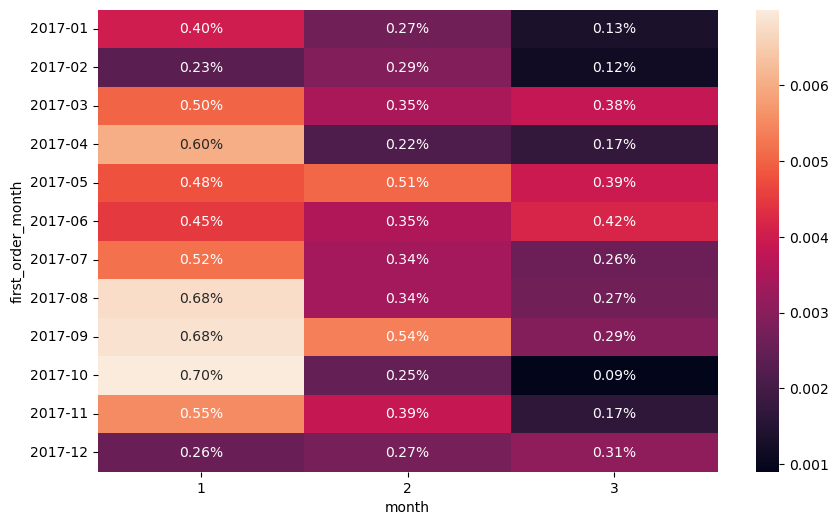

In [45]:
# строим sns.heatmap
plt.figure(figsize=(10,6))
sns.heatmap (rr_df_for_map, fmt='.2%', annot = True)

Самые успешные по Retention Rate на третий месяц когорты - 2017-03 (0.38%), 2017-05 (0.39%), 2017-06 (0.42%).

### RFM-сегментация пользователей

In [46]:
# Объединим таблицы заказов, покупателей и товаров

customers_orders1 = customers.merge(orders, on = 'customer_id', how='left')
rfm_df = customers_orders1.merge(order_items, on = 'order_id', how='left')

rfm_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [47]:
# оставляем только выполненые заказы

rfm_df = rfm_df.query('order_approved_at != "NaT" and order_status == "delivered"')\
                [['customer_unique_id','order_id', 'order_purchase_timestamp', 'order_item_id', 'product_id', 'price']]\
                .dropna() # избавимся от NaN
rfm_df.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_id,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00


### Воспользуемся методологией построения RFM
To get the RFM score of a customer, we need to first calculate the R, F and M scores on a scale from 1 (worst) to 5 (best).

1. calculate Recency = number of days since last purchase
2. calculate Freqency = number of purchases during the studied period (usually one year)
3. calculate Monetary = total amount of purchases made during the studied period
4. find quintiles for each of these dimensions
5. give a grade to each dimension depending in which quintiles it stands
6. combine R, F and M scores to get the RFM score
7. map RF scores to segments

#### 1. Посчитаем Recency (время от последней покупки пользователя до текущей даты)

In [48]:
# определим самую последнюю дату в датасете, для этого выделим все столбцы с датами и найдём максимальное значение среди них
# сохраним это значение в отдельный столбец

rfm_df['today_date'] = orders [['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]\
        .max().max()
rfm_df.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_id,price,today_date
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,2018-11-12
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,2018-11-12
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,2018-11-12
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,2018-11-12
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,2018-11-12


Будем считать нашей текущей датой, к которой мы привязываемся - 2018-11-12

In [49]:
# создадим датафрейм для подсчета даты последнего заказа по пользователям

last_purchase_date = rfm_df.groupby ('customer_unique_id', as_index = False)\
                    .agg({'order_purchase_timestamp':'max'})\
                    .rename (columns = {'order_purchase_timestamp':'last_purchase_date'})

# объединим рабочий датафрейм с указанным выше

rfm_df = rfm_df.merge (last_purchase_date, on = 'customer_unique_id', how = 'inner')

# добавим колонку R, в которой посчитаем количество дней между датой последнего заказа и текущей датой

rfm_df ["recency"] = (rfm_df.today_date - rfm_df.last_purchase_date).dt.days

In [50]:
rfm_df.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_id,price,today_date,last_purchase_date,recency
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,2018-11-12,2017-05-16 15:05:35,544
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,2018-11-12,2018-01-12 20:48:24,303
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,2018-11-12,2018-05-19 16:07:45,176
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,2018-11-12,2018-03-13 16:06:38,243
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,2018-11-12,2018-07-29 09:51:30,105


#### 2. Посчитаем Frequency (суммарное количество покупок у пользователя за всё время)

In [51]:
# в отдельный датасет сгруппируем пользователей по количеству заказов

frequency_df = rfm_df.groupby('customer_unique_id', as_index = False)\
                    .agg({'order_id':'count'})\
                    .rename (columns = {'order_id':'frequency'})

# объединим с основным датасетом, таким образом добавится столбец "F"

rfm_df = rfm_df.merge (frequency_df, on = 'customer_unique_id', how = 'inner')
rfm_df.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_id,price,today_date,last_purchase_date,recency,frequency
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,2018-11-12,2017-05-16 15:05:35,544,1
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,2018-11-12,2018-01-12 20:48:24,303,1
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,2018-11-12,2018-05-19 16:07:45,176,1
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,2018-11-12,2018-03-13 16:06:38,243,1
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,2018-11-12,2018-07-29 09:51:30,105,1


#### 3. Посчитаем Monetary (сумма покупок за всё время)

In [52]:
# для этого в отдельный датасет сгруппируем пользователей по сумме price

monetary_df = rfm_df.groupby('customer_unique_id', as_index = False)\
                    .agg({'price':'sum'})\
                    .rename (columns = {'price':'monetary'})
rfm_df = rfm_df.merge(monetary_df, on = 'customer_unique_id', how = 'inner')
rfm_df.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,product_id,price,today_date,last_purchase_date,recency,frequency,monetary
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,2018-11-12,2017-05-16 15:05:35,544,1,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,2018-11-12,2018-01-12 20:48:24,303,1,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,2018-11-12,2018-05-19 16:07:45,176,1,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,2018-11-12,2018-03-13 16:06:38,243,1,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,2018-11-12,2018-07-29 09:51:30,105,1,230.00


#### 4. Найдём границы для Recency

In [54]:
# для начала отбросим ненужные столбцы, оставив только наши метрики для каждого пользователя

rfm_df = rfm_df.groupby('customer_unique_id')\
                .agg({'recency':'max', 'frequency':'max', 'monetary':'max'})

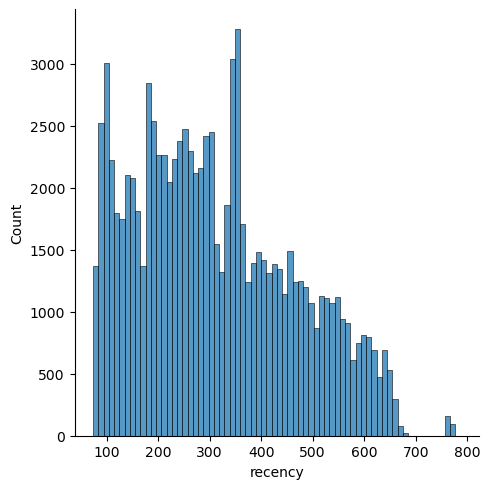

In [55]:
# посмотрим на распределение recency

sns.displot(rfm_df.recency)

Так как пользователи распределены достаточно вариативно относительно метрики, в данном случае мы можем воспользовать квантилями для установления границ метрики. Установим границы Recency по значениям 0.25, 0.50, 0.75 квантилей. Чем меньше дней прошло с покупки, тем выше рейтинг и меньше значение R.

In [56]:
rfm_df.recency.describe()

count    93345.000000
mean       311.433714
std        152.557599
min         74.000000
25%        188.000000
50%        292.000000
75%        420.000000
max        787.000000
Name: recency, dtype: float64

In [57]:
# посчитаем квантили и напишем функцию для распределения метрики

q_25 = rfm_df.recency.quantile(0.25)
q_50 = rfm_df.recency.quantile(0.5)
q_75 = rfm_df.recency.quantile(0.75)

def r_score (df):
    if df <= q_25:
        return 1
    elif df <= q_50:
        return 2
    elif df <= q_75:
        return 3
    else:
        return 4

In [59]:
# создадим столбец для рейтинга Requency

rfm_df ['R'] = rfm_df.recency.apply (lambda x: r_score (x))
rfm_df.head()

,recency,frequency,monetary,R
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,185,1,129.90,1
0000b849f77a49e4a4ce2b2a4ca5be3f,188,1,18.90,1
0000f46a3911fa3c0805444483337064,611,1,69.00,4
0000f6ccb0745a6a4b88665a16c9f078,395,1,25.99,3
0004aac84e0df4da2b147fca70cf8255,362,1,180.00,3


#### 5. Найдём границы для Frequency

<Figure size 2500x500 with 0 Axes>

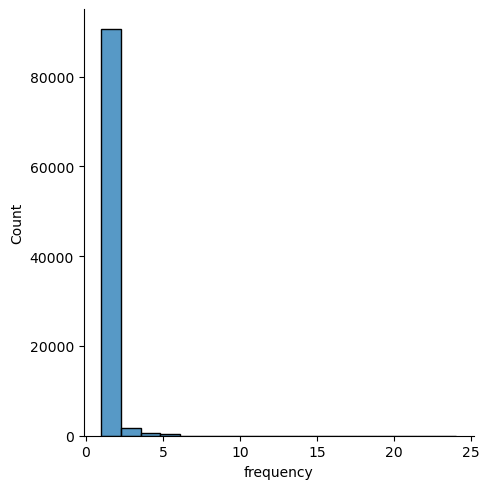

In [60]:
# посмотрим на распределение Frequency

plt.figure(figsize=(25,5))
sns.displot(rfm_df.frequency)

Видим очень большое отклонение значений в левую сторону

In [61]:
# посмотрим на цифры

rfm_df.frequency.value_counts()

1     81737
2      8795
3      1646
4       621
5       241
6       190
7        45
8        16
10       11
11       11
9        10
12        9
15        3
14        3
20        2
13        2
18        1
21        1
24        1
Name: frequency, dtype: int64

Чаще всего пользователи совершали не больше одной покупки. Также есть большие кластеры по двум покупкам, трём покупкам, от 4 до 6 покупок, от 7 до 12 покупок, и остальные. Применим эти границы и поделим пользователей. Чем больше покупок, тем выше рейтинг и меньше значение F.

In [62]:
# напишем функцию для распределения метрики

def f_score (df):
    if df <= 1:
        return 6
    elif df <= 2:
        return 5
    elif df <= 3:
        return 4
    elif df <= 6:
        return 3
    elif df <= 12:
        return 2  
    else:
        return 1

In [63]:
rfm_df ['F'] = rfm_df.frequency.apply (lambda x: f_score (x))
rfm_df.head()

,recency,frequency,monetary,R,F
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,185,1,129.90,1,6
0000b849f77a49e4a4ce2b2a4ca5be3f,188,1,18.90,1,6
0000f46a3911fa3c0805444483337064,611,1,69.00,4,6
0000f6ccb0745a6a4b88665a16c9f078,395,1,25.99,3,6
0004aac84e0df4da2b147fca70cf8255,362,1,180.00,3,6


#### 6. Найдём границы для Monetary

<Axes: xlabel='monetary', ylabel='Count'>

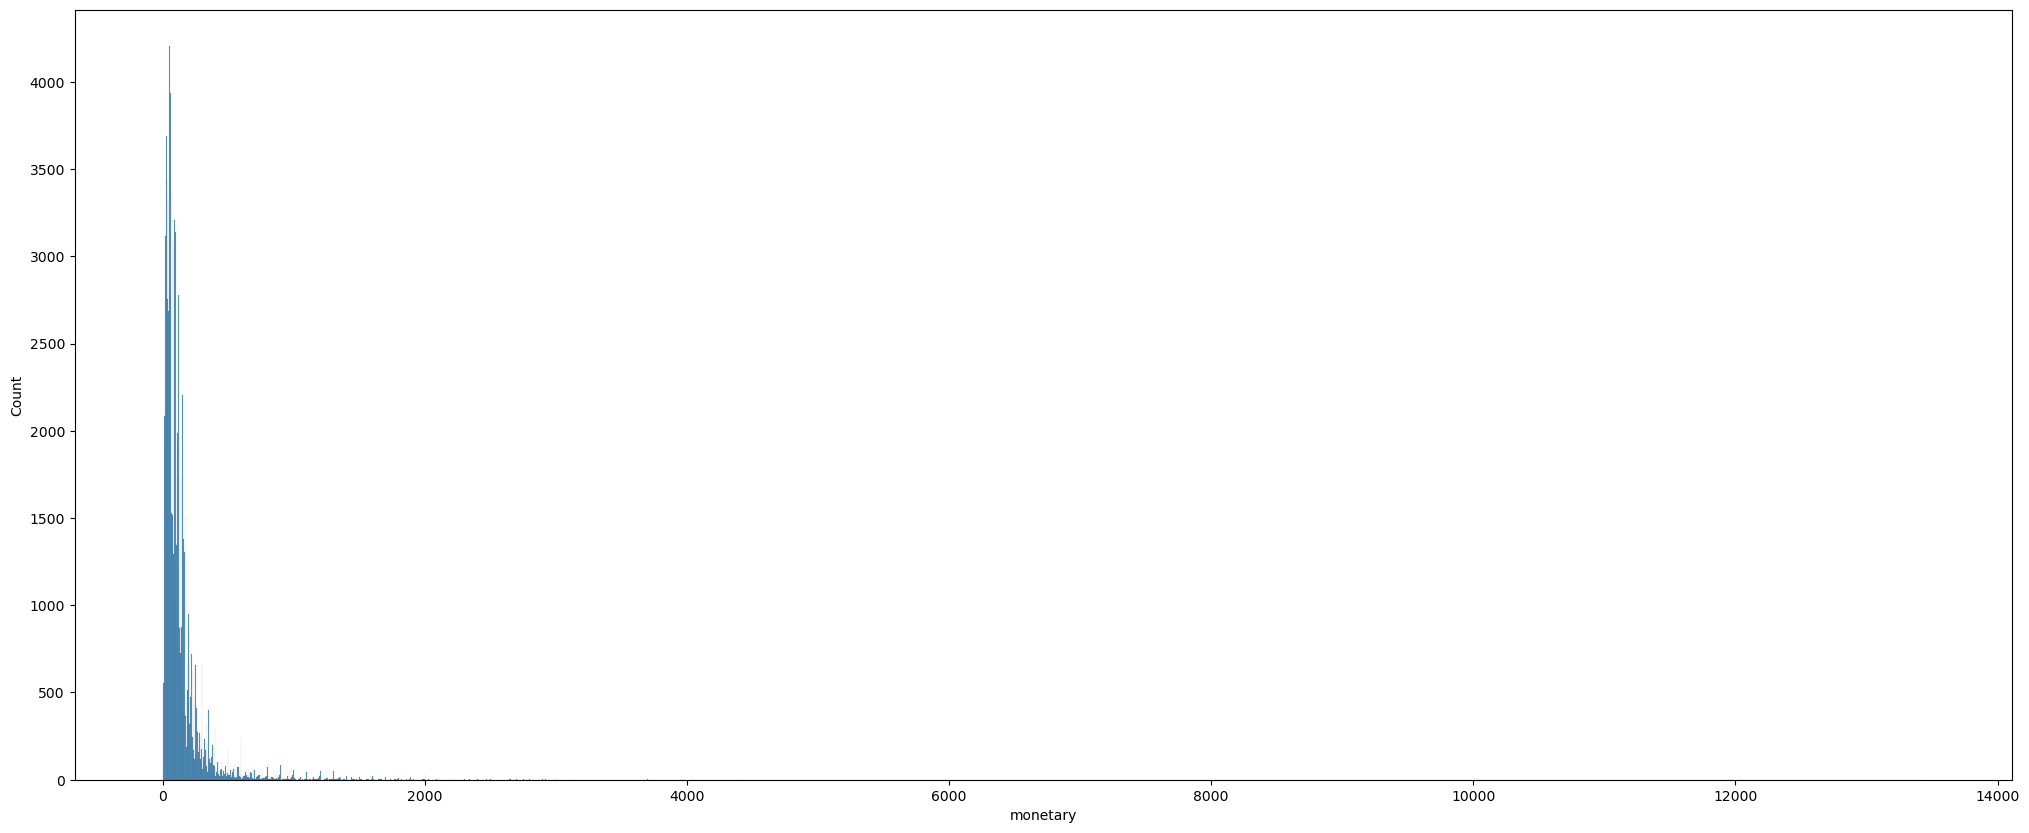

In [65]:
# посмотрим на распределение Monetary

plt.figure(figsize=(25,10))
sns.histplot(rfm_df.monetary)

Также как у Frequency видим отклонение значений влево

In [66]:
# посмотрим на цифры

rfm_df.monetary.describe()

count    93345.000000
mean       141.623308
std        215.705007
min          0.850000
25%         47.650000
50%         89.760000
75%        154.750000
max      13440.000000
Name: monetary, dtype: float64

Максимальное значение Monetary - 13440, при этом большая часть пользователей (до 0.75 квантиля) не выходит за пределы отметки 154 (т.е. разброс по стоимости заказов между ними очень мал). Первой границей кластера мы возьмём 0.75 квантиль.

In [71]:
# распределение выше 0.75 квантиля

rfm_df.loc[rfm_df.monetary > rfm_df.monetary.quantile(0.75)].monetary.describe()

count    23336.000000
mean       354.229555
std        348.233166
min        154.800000
25%        189.000000
50%        240.000000
75%        369.900000
max      13440.000000
Name: monetary, dtype: float64

Будем считать верхней границей этого кластера 0.75 квантиль (370 долларов) данной выборки. Так мы захватим большую часть клиентов, при этом разброс Monetary не сильный. Посмотрим эту выборку выше 0.75 квантиля.

In [68]:
# распределение выше 0.75 квантиля от предыдущей выборки

rfm_df.loc[rfm_df.monetary > 370]\
        .monetary.describe()

count     5791.000000
mean       741.299254
std        528.392822
min        370.200000
25%        441.800000
50%        584.740000
75%        829.990000
max      13440.000000
Name: monetary, dtype: float64

Здесь нам подойдёт верхняя граница по 0.75 квантилю (829 долларов). Посмотрим эту выборку выше 0.75 квантиля.

In [69]:
# распределение выше 0.75 квантиля от предыдущей выборки
rfm_df.loc[rfm_df.monetary > 829]\
        .monetary.describe()

count     1449.000000
mean      1371.388468
std        734.293101
min        829.990000
25%        950.000000
50%       1180.000000
75%       1549.990000
max      13440.000000
Name: monetary, dtype: float64

Такое распределение подходит для кластера. Возьмём верхней границей 1550 долларов. И посмотрим выборку выше этого значения

In [70]:
rfm_df.loc[rfm_df.monetary > 1550]\
        .monetary.describe()

count      361.000000
mean      2238.593850
std       1025.329094
min       1554.000000
25%       1700.000000
50%       1989.000000
75%       2338.080000
max      13440.000000
Name: monetary, dtype: float64

Оставим выборку меньше 2338 как отдельный кластер. Пользователей, совершивших покупки на сумму более 2338, будем считать отдельным кластером по причине большой суммы и малочисленности.

Таким образом, наши кластеры:\
1 - больше 2338\
2 - больше 1550 и меньше 2338\
3 - больше 829 и меньше 1550\
4 - больше 370 и меньше 829\
5 - больше 155 и меньше 370\
6 - меньше 155


Создадим рейтинг. Чем выше сумма покупки, тем выше рейтинг и ниже значение M.

In [72]:
# напишем функцию для распределения метрики

def m_score (df):
    if df <= 155:
        return 6
    elif df <= 370:
        return 5
    elif df <= 829:
        return 4
    elif df <= 1550:
        return 3
    elif df <= 2338:
        return 2
    else:
        return 1

In [73]:
rfm_df ['M'] = rfm_df.monetary.apply (lambda x: m_score (x))
rfm_df.head()

,recency,frequency,monetary,R,F,M
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,185,1,129.90,1,6,6
0000b849f77a49e4a4ce2b2a4ca5be3f,188,1,18.90,1,6,6
0000f46a3911fa3c0805444483337064,611,1,69.00,4,6,6
0000f6ccb0745a6a4b88665a16c9f078,395,1,25.99,3,6,6
0004aac84e0df4da2b147fca70cf8255,362,1,180.00,3,6,5


#### 7. Построим столбец RFM - рейтинга


In [75]:
rfm_df ['RFM'] = rfm_df.R.astype('str') + rfm_df.F.astype('str') + rfm_df.M.astype('str')
rfm_df.head()

,recency,frequency,monetary,R,F,M,RFM
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,185,1,129.90,1,6,6,166
0000b849f77a49e4a4ce2b2a4ca5be3f,188,1,18.90,1,6,6,166
0000f46a3911fa3c0805444483337064,611,1,69.00,4,6,6,466
0000f6ccb0745a6a4b88665a16c9f078,395,1,25.99,3,6,6,366
0004aac84e0df4da2b147fca70cf8255,362,1,180.00,3,6,5,365


Посмотрим, как распределёны кластеры RFM по количеству пользователей

In [77]:
# создадим датафрейм для построения графиков

rfm_plot_df = rfm_df.groupby('RFM', as_index = False)\
                    .agg({'recency':'count'})\
                    .rename(columns = {'recency':'count_of_customers'})\
                    .sort_values('count_of_customers', ascending = False)
rfm_plot_df.head()

,RFM,count_of_customers
30,166,16174
90,366,16016
119,466,15958
60,266,15851
118,465,3443


Text(0, 0.5, 'Количество клиентов')

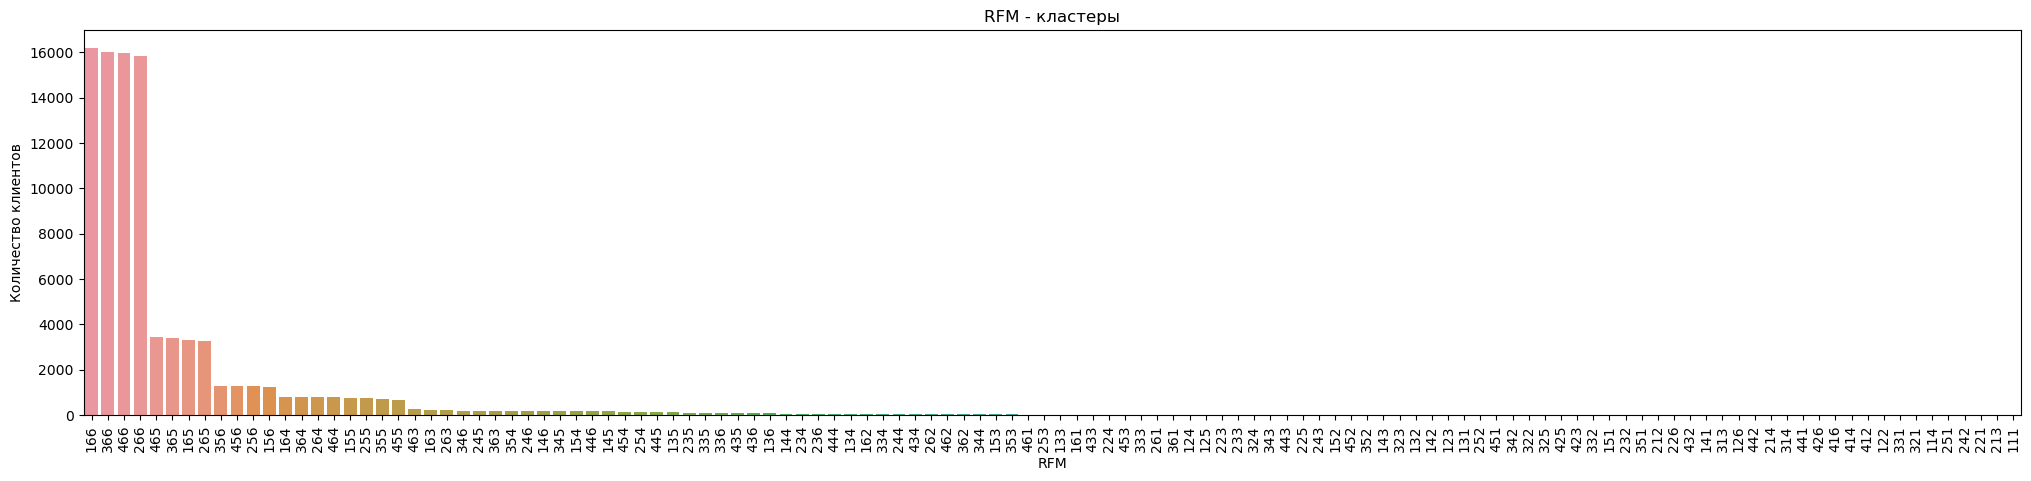

In [78]:
plt.figure(figsize=(25,5))
sns.barplot (data = rfm_plot_df, x = 'RFM', y = 'count_of_customers')

plt.xticks(rotation=90)
plt.title('RFM - кластеры')
plt.xlabel('RFM')
plt.ylabel('Количество клиентов')

Описание RFM:\
R (разница между текущей датой и датой последней покупки):\
1 - не более 188 дней\
2 - от 189 до 293 дней\
3 - от 294 до 421 дня\
4 - больше 421 дней

F (количество покупок):\
1 - больше 12 покупок\
2 - от 7 до 12 покупок\
3 - от 4 до 6 покупок\
4 - 3 покупки\
5 - 2 покупки\
6 - 1 покупка

M (суммарная стоимость покупок):\
1 - от 2338 до 13340\
2 - больше 1550 и меньше 2338\
3 - больше 829 и меньше 1550\
4 - больше 370 и меньше 829\
5 - больше 155 и меньше 370\
6 - меньше 155

По графику можем разбить кластеры на группы по количеству клиентов.\
1. Первая группа составляет абсолютное большинство - кластеры 166, 266, 466, 366 - это те, кто совершил по одной покупке на минимальную сумму, при этом давность покупки различается. Тоесть такие клиенты - это тренд для нашего магазина уже на протяжении года и больше.\
2. Вторая группа - кластеры 465, 365, 265, 165 - те, кто совершил по одной покупке на сумму от 155 до 370 долларов, при этом давность также различается. Таких клиентов меньше, но это тоже многочисленная часть аудитории.\
3. Третья группа - кластеры 456, 356, 156, 356, 264, 164, 364, 464, 255, 155, 355, 455 - те, кто совершил одну или две покупки, при этом стоимость может доходить до 839 долларов.\
4. Четвертая группа - все остальные.

Чтобы понять, какие кластеры приносят нам наибольший доход, построим график распределения Monetary по кластерам.

In [79]:
rfm_monetary_df = rfm_df.groupby ('RFM', as_index = False)\
                        .agg ({'monetary':'sum'})\
                        .sort_values ('monetary', ascending = False)
rfm_monetary_df

,RFM,monetary
30,166,1132190.35
60,266,1112102.90
90,366,1111928.42
119,466,1075923.76
118,465,778715.85
...,...,...
1,114,714.63
38,226,219.23
6,126,186.19
96,426,108.90


Text(0, 0.5, 'Monetary')

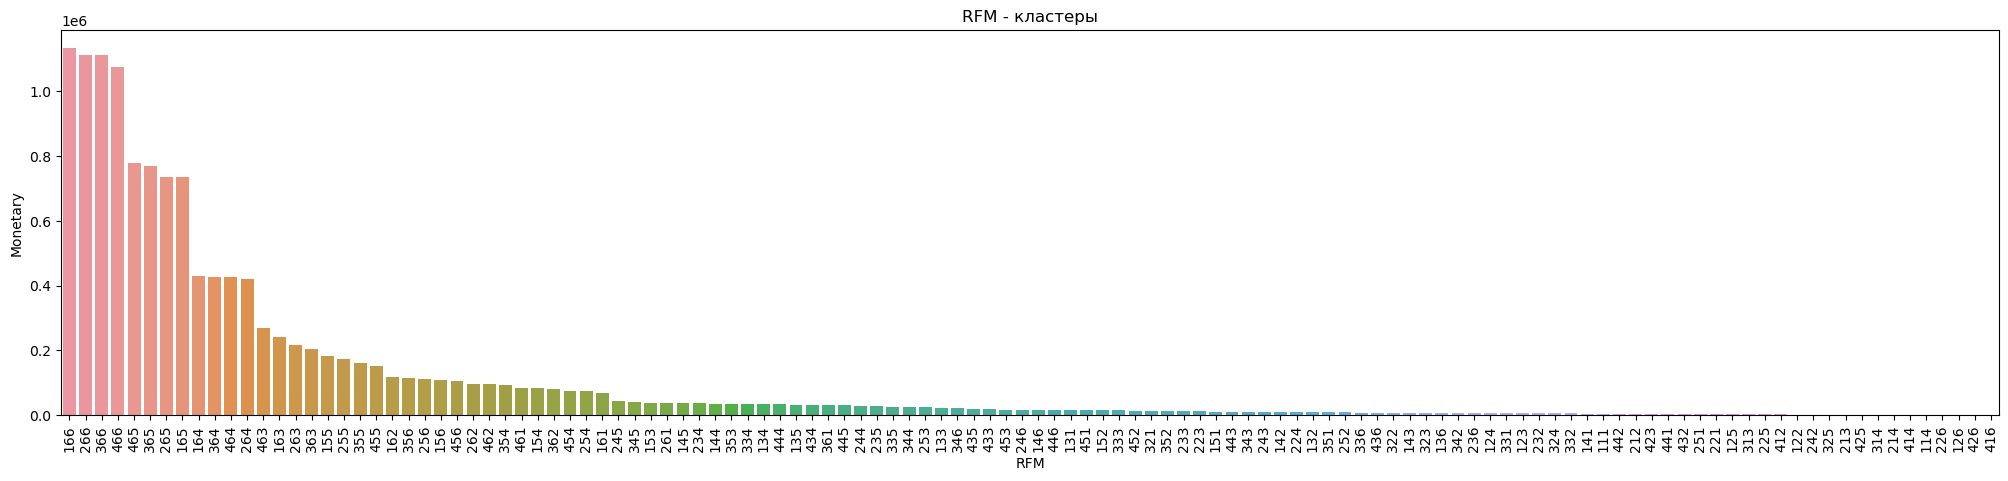

In [80]:
plt.figure(figsize=(25,5))
sns.barplot (data = rfm_monetary_df, x = 'RFM', y = 'monetary')
plt.xticks(rotation=90)
plt.title('RFM - кластеры')
plt.xlabel('RFM')
plt.ylabel('Monetary')

1. Первая группа - 266, 166, 366, 466 - по доходу более 1.1 миллиона долларов.\
2. Вторая группа - 465, 365, 265, 165 - по доходу около 0.8 миллиона долларов.\
3. Третья группа - 164, 264, 364, 464 - по доходу около 0.5 миллиона долларов.\
4. Четвёртая группа - остальные - по доходу менее 0.3 миллиона долларов.

Мы видим, что наши распределение групп по доходу и распределение по численности клиентов очень хорошо коррелируют, первое почти полностью входит во второе.

#### 8. Построим матрицу сегментов


По анализу Monetary нам стала более понятна основная аудитория, приносящая доход. Теперь построим сегменты нашей аудитории основываясь на рейтингах R и F. Всего мною выделено 10 сегментов.

In [84]:
# добавим сегменты в датафрейм
segt_map = {
    r'1[1-3]': 'лояльные',
    r'[2-4][1-3]': 'спящие лояльные',
    r'14': 'потенциально лояльные',
    r'24': 'рискуем потерять лояльность',
    r'[3-4]4': 'потерявшие лояльность',
    r'15': 'заслужили второй шанс',
    r'[2-3]5': 'спящие',
    r'45': 'мы их потеряли',
    r'16': 'новички',
    r'26': 'возможна вторая покупка',
    r'[3-4]6':'не вернулись'
}

rfm_df['segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str)
rfm_df['segment'] = rfm_df['segment'].replace(segt_map, regex=True)

In [85]:
rfm_df.head()

,recency,frequency,monetary,R,F,M,RFM,segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,185,1,129.90,1,6,6,166,новички
0000b849f77a49e4a4ce2b2a4ca5be3f,188,1,18.90,1,6,6,166,новички
0000f46a3911fa3c0805444483337064,611,1,69.00,4,6,6,466,не вернулись
0000f6ccb0745a6a4b88665a16c9f078,395,1,25.99,3,6,6,366,не вернулись
0004aac84e0df4da2b147fca70cf8255,362,1,180.00,3,6,5,365,не вернулись


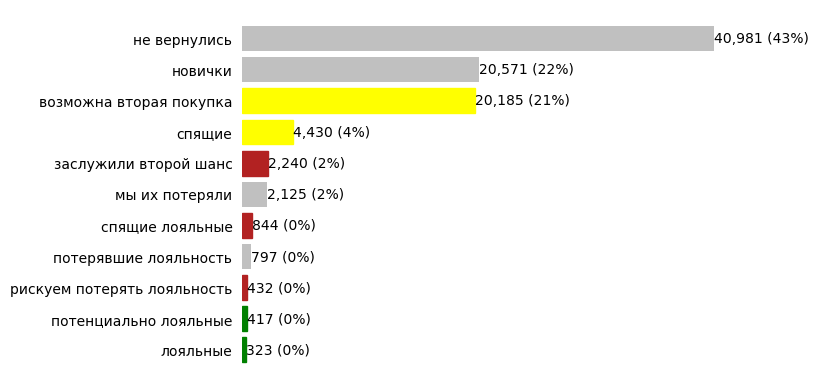

In [89]:
# построим график количества клиентов по каждому сегменту
segments_counts = rfm_df['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['лояльные', 'потенциально лояльные']:
            bar.set_color('green')
        if segments_counts.index[i] in ['спящие лояльные', 'рискуем потерять лояльность', 'заслужили второй шанс']:
            bar.set_color('firebrick')
        if segments_counts.index[i] in ['спящие', 'возможна вторая покупка']:
            bar.set_color('yellow')       
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

### Выводы
1. На данный момент наша основная аудитория, которая приносит наибольший доход - люди, которые совершают 1 покупку, покупая на сумму до 829 долларов, при этом такие клиенты - это практически абсолютное большинство.
2. Retention Rate нашего магазина очень низок. Для увеличения дохода можно попробовать увеличить Retention именно этой аудитории - кластеры *66, *65, *64 - повлияв на неё рекламой или акциями. Возможно также, что дело в качестве товара, и люди не хотят возвращатся за новой покупкой.
3. У нас есть клиенты - например, по кластерам 111, 131, 321 - совершившие от 3 до 12 покупок на стоимость выше 2,5 тысяч до 13,3 тысяч долларов, тоесть закупающиеся большими партиями,но они немногочисленны. Возможно, стоит рассмотреть стратегии по привлечению именно таких клиентов.
4. По разбиению на сегменты можно сказать следующее:
- лояльных и потенциально лояльных клиентов очень мало, почти 0% от общего количества, но они есть\
- чтобы повысить Retention, в первую очередь нужно обращать внимание на бордовые и жёлтые сегменты на графике, эти пользователи наиболее расположены к повторным покупкам в нашем магазине.